<a href="https://colab.research.google.com/github/jejec0703/NLP-Natural-Language-Processing/blob/master/8_NLP_%EC%97%B0%EC%8A%B5_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')                             
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 561,089
Trainable params: 561,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 91s 233ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6930 - val_accuracy: 0.5022
Epoch 2/10
391/391 [==============================] - 90s 230ms/step - loss: 0.6928 - accuracy: 0.5012 - val_loss: 0.6928 - val_accuracy: 0.5026
Epoch 3/10
391/391 [==============================] - 90s 229ms/step - loss: 0.6910 - accuracy: 0.5017 - val_loss: 0.6930 - val_accuracy: 0.5002
Epoch 4/10
391/391 [==============================] - 88s 226ms/step - loss: 0.6885 - accuracy: 0.5079 - val_loss: 0.6965 - val_accuracy: 0.4996
Epoch 5/10
391/391 [==============================] - 88s 224ms/step - loss: 0.6874 - accuracy: 0.5035 - val_loss: 0.6945 - val_accuracy: 0.5004
Epoch 6/10
391/391 [==============================] - 88s 225ms/step - loss: 0.6862 - accuracy: 0.5055 - val_loss: 0.6940 - val_accuracy: 0.5003
Epoch 7/10
391/391 [==============================] - 88s 226ms/step - loss: 0.6852 - accuracy: 0.5049 - val_loss: 0.6950 - val_ac

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])  
  plt.show()

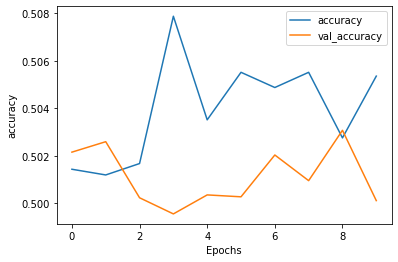

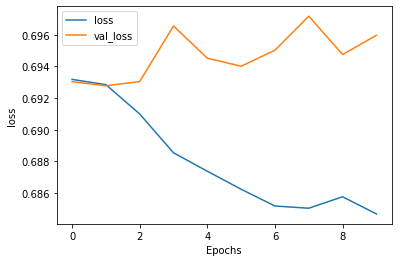

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
### Bidirectional 해서 성능을 비교해보자 ###
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')                             
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### bidirectional 128개 ==> cnn의 2배

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 166s 425ms/step - loss: 0.5311 - accuracy: 0.7342 - val_loss: 0.4501 - val_accuracy: 0.8059
Epoch 2/10
391/391 [==============================] - 163s 416ms/step - loss: 0.4116 - accuracy: 0.8098 - val_loss: 0.6317 - val_accuracy: 0.6318
Epoch 3/10
391/391 [==============================] - 162s 414ms/step - loss: 0.4623 - accuracy: 0.7870 - val_loss: 0.4439 - val_accuracy: 0.8026
Epoch 4/10
391/391 [==============================] - 161s 411ms/step - loss: 0.2997 - accuracy: 0.8878 - val_loss: 0.4420 - val_accuracy: 0.8124
Epoch 5/10
391/391 [==============================] - 161s 411ms/step - loss: 0.2455 - accuracy: 0.9088 - val_loss: 0.4006 - val_accuracy: 0.8348
Epoch 6/10
391/391 [==============================] - 161s 411ms/step - loss: 0.1997 - accuracy: 0.9283 - val_loss: 0.4274 - val_accuracy: 0.8404
Epoch 7/10
391/391 [==============================] - 161s 411ms/step - loss: 0.2815 - accuracy: 0.8789 - val_loss: 0.5074 -

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])  
  plt.show()

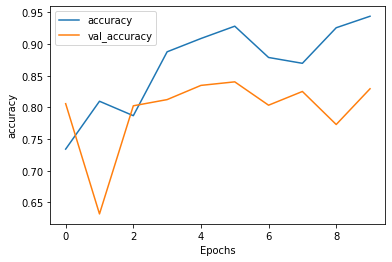

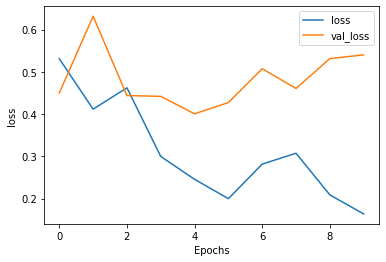

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
### Bidirectional 한 층을 더 추가해서 성능을 비교해보자 ###
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')                             
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 64)          523840    
_________________________________________________________________
bidirectional_11 (Bidirectio (None, None, 128)         66048     
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 697,025
Trainable params: 697,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 325s 832ms/step - loss: 0.5987 - accuracy: 0.6658 - val_loss: 0.4677 - val_accuracy: 0.7928
Epoch 2/10
391/391 [==============================] - 322s 823ms/step - loss: 0.3971 - accuracy: 0.8312 - val_loss: 0.4523 - val_accuracy: 0.7992
Epoch 3/10
391/391 [==============================] - 319s 816ms/step - loss: 0.4463 - accuracy: 0.8000 - val_loss: 0.4597 - val_accuracy: 0.7958
Epoch 4/10
391/391 [==============================] - 317s 811ms/step - loss: 0.3747 - accuracy: 0.8425 - val_loss: 0.4323 - val_accuracy: 0.8206
Epoch 5/10
391/391 [==============================] - 316s 808ms/step - loss: 0.2912 - accuracy: 0.8825 - val_loss: 0.4656 - val_accuracy: 0.8172
Epoch 6/10
391/391 [==============================] - 317s 812ms/step - loss: 0.2728 - accuracy: 0.8928 - val_loss: 0.3654 - val_accuracy: 0.8446
Epoch 7/10
391/391 [==============================] - 318s 813ms/step - loss: 0.2447 - accuracy: 0.9059 - val_loss: 0.3807 -

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])  
  plt.show()

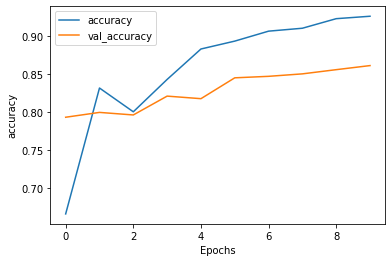

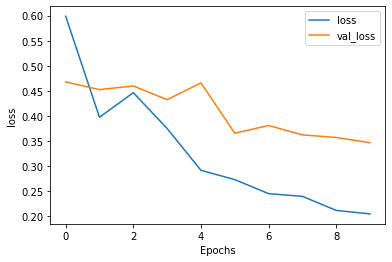

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
### Convolution1D ###
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                             tf.keras.layers.Conv1D(128, 5, activation='relu'),
                             tf.keras.layers.GlobalAvgPool1D(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')                             
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 47s 120ms/step - loss: 0.4581 - accuracy: 0.7674 - val_loss: 0.3034 - val_accuracy: 0.8790
Epoch 2/10
391/391 [==============================] - 30s 77ms/step - loss: 0.2241 - accuracy: 0.9160 - val_loss: 0.2956 - val_accuracy: 0.8811
Epoch 3/10
391/391 [==============================] - 26s 68ms/step - loss: 0.1703 - accuracy: 0.9388 - val_loss: 0.3451 - val_accuracy: 0.8684
Epoch 4/10
391/391 [==============================] - 25s 64ms/step - loss: 0.1366 - accuracy: 0.9509 - val_loss: 0.3662 - val_accuracy: 0.8710
Epoch 5/10
391/391 [==============================] - 26s 66ms/step - loss: 0.1101 - accuracy: 0.9621 - val_loss: 0.4153 - val_accuracy: 0.8651
Epoch 6/10
391/391 [==============================] - 24s 63ms/step - loss: 0.0850 - accuracy: 0.9728 - val_loss: 0.4694 - val_accuracy: 0.8602
Epoch 7/10
391/391 [==============================] - 24s 62ms/step - loss: 0.0678 - accuracy: 0.9808 - val_loss: 0.5285 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])  
  plt.show()

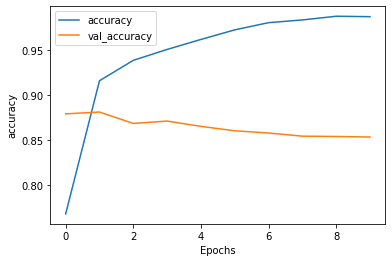

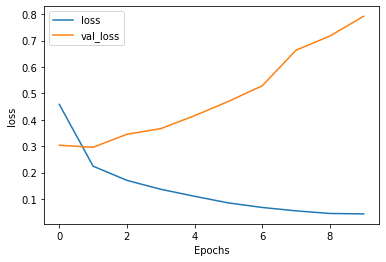

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
### GRU 추가해서 성능을 비교해보자 ###
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')                             
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 64)          523840    
_________________________________________________________________
bidirectional_13 (Bidirectio (None, None, 128)         49920     
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 128)               74496     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 656,577
Trainable params: 656,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 333s 851ms/step - loss: 0.5462 - accuracy: 0.6909 - val_loss: 0.3699 - val_accuracy: 0.8361
Epoch 2/10
391/391 [==============================] - 332s 849ms/step - loss: 0.2798 - accuracy: 0.8872 - val_loss: 0.3129 - val_accuracy: 0.8662
Epoch 3/10
391/391 [==============================] - 330s 845ms/step - loss: 0.2115 - accuracy: 0.9172 - val_loss: 0.3435 - val_accuracy: 0.8581
Epoch 4/10
391/391 [==============================] - 331s 847ms/step - loss: 0.1666 - accuracy: 0.9380 - val_loss: 0.3707 - val_accuracy: 0.8497
Epoch 5/10
391/391 [==============================] - 331s 846ms/step - loss: 0.1193 - accuracy: 0.9577 - val_loss: 0.3954 - val_accuracy: 0.8610
Epoch 6/10
391/391 [==============================] - 330s 844ms/step - loss: 0.0769 - accuracy: 0.9744 - val_loss: 0.4441 - val_accuracy: 0.8632
Epoch 7/10
391/391 [==============================] - 331s 847ms/step - loss: 0.0598 - accuracy: 0.9801 - val_loss: 0.5183 -

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])  
  plt.show()

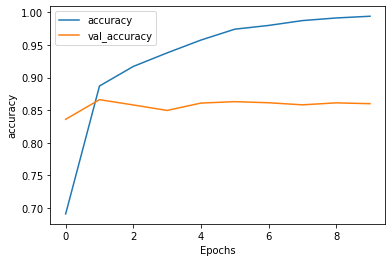

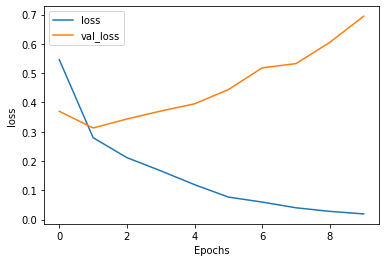

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')